<a href="https://colab.research.google.com/github/albertotrunk/depth2video/blob/main/stable_diffusion_depth2video_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites


In [2]:
#todo
#ffmpeg -start_number 0 -i input.%03d.png -c:v libx264 -r 24 -pix_fmt yuv420p output.mp4
#ffmpeg -i output.mp4 -filter:v "minterpolate=mi_mode=2" output.mp4 
#ffmpeg -i <input> -filter:v fps=30 <output>
#sampledata
#color.mp4
#depth

#GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


#memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Mon Dec 12 23:51:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    53W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
#%pip install ..

%pip install -U git+https://github.com/huggingface/transformers.git
%pip install -U git+https://github.com/huggingface/diffusers.git accelerate ftfy scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-bwaunap6
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-bwaunap6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 182 kB 29.9 MB/s 
     |████████████████████████████████| 7.6 MB 70.6 MB/s 
  Created wheel for transformers: filename=transformers-4.26.0.dev0-py3-none-any.whl size=5961994 sha256=5074e272da319fbd85f1d8a5405b9071158a321d7ed362e73cb2c4b1861ef902
  Stored in directory: /tmp/pip-ephem-wheel-cache-6cmh2_ko/wheels/05/0a/97/64ae47c27ba95fae2cb5838e7b4b7247a34d4a8ba5f7092de2
Successfully built transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/hugging

# Basic img2depth
Main example img2depth

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

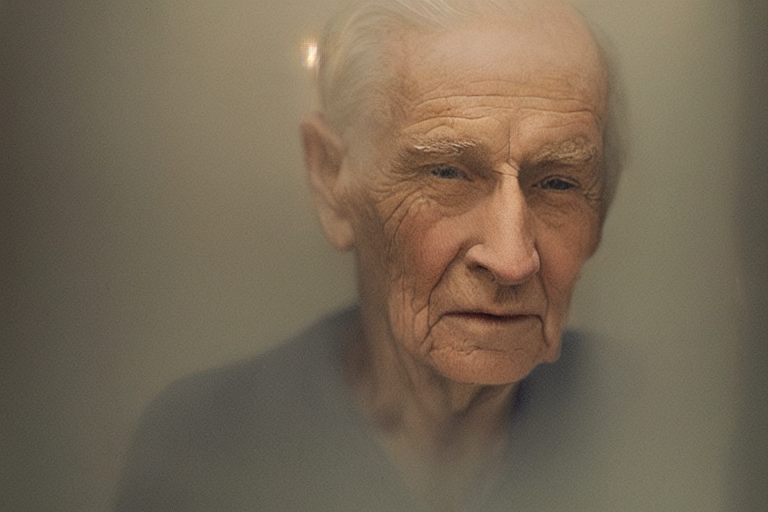

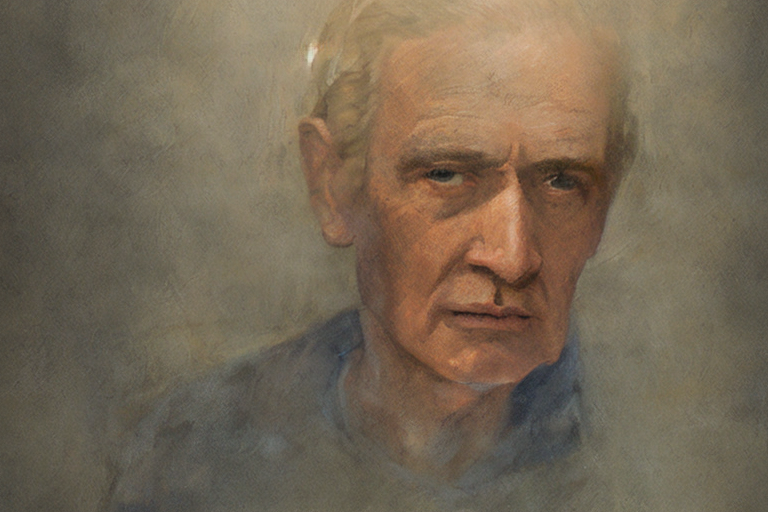

In [11]:
import torch
import requests
from PIL import Image
from diffusers import StableDiffusionDepth2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
   "stabilityai/stable-diffusion-2-depth",
   torch_dtype=torch.float16,
).to("cuda")

url = "https://github.com/Stability-AI/stablediffusion/blob/main/assets/stable-samples/depth2img/old_man.png?raw=true"
init_image = Image.open(requests.get(url, stream=True).raw)


prompt = "a render of a young man" #@param {type:"string"}
n_propmt = "bad, deformed, ugly, bad anotomy" #@param {type:"string"}
strength = 0.4  #@param {type:"slider", min:0, max:1, step:0.1}

image = pipe(prompt=prompt, image=init_image, negative_prompt=n_propmt, strength=strength).images[0]

from IPython.display import Image, display
display(init_image)
display(image)
